In [5]:
%load_ext autoreload
%autoreload 2

from unboxer.deepvis import DeepVis

deep_vis = DeepVis(model_architecture=None,#'vgg16', 
                   save_dir='/mnt/ml-team/homes/jakub.czakon/.unblackboxing_webinar_data/data/filter_images')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
for i, l in enumerate(deep_vis.model_.layers):
    print(i,l.name)

0 input_1
1 block1_conv1
2 block1_conv2
3 block1_pool
4 block2_conv1
5 block2_conv2
6 block2_pool
7 block3_conv1
8 block3_conv2
9 block3_conv3
10 block3_pool
11 block4_conv1
12 block4_conv2
13 block4_conv3
14 block4_pool
15 block5_conv1
16 block5_conv2
17 block5_conv3
18 block5_pool
19 flatten
20 fc1
21 fc2
22 predictions


In [36]:
conv_layer_ids = [k for k,v in deep_vis.layer_filter_ids_.items() 
                  if v<600]
conv_layer_ids

[1, 2, 4, 5, 7, 8, 9, 11, 12, 13, 15, 16, 17]

In [2]:
conv_layer_ids = [16, 17]

In [ ]:
deep_vis.generate_max_activation_images(conv_layer_ids)

layer:16 filter:0
Working on filters: [0]
Working on filters: [0]
layer:16 filter:1
Working on filters: [1]
Working on filters: [1]
layer:16 filter:2
Working on filters: [2]
Working on filters: [2]
layer:16 filter:3
Working on filters: [3]
Working on filters: [3]
layer:16 filter:4
Working on filters: [4]
Working on filters: [4]
layer:16 filter:5
Working on filters: [5]
Working on filters: [5]
layer:16 filter:6
Working on filters: [6]
Working on filters: [6]
layer:16 filter:7
Working on filters: [7]
Working on filters: [7]
layer:16 filter:8
Working on filters: [8]
Working on filters: [8]
layer:16 filter:9
Working on filters: [9]
Working on filters: [9]
layer:16 filter:10
Working on filters: [10]
Working on filters: [10]
layer:16 filter:11
Working on filters: [11]
Working on filters: [11]
layer:16 filter:12
Working on filters: [12]
Working on filters: [12]
layer:16 filter:13
Working on filters: [13]
Working on filters: [13]
layer:16 filter:14
Working on filters: [14]
Working on filters: 

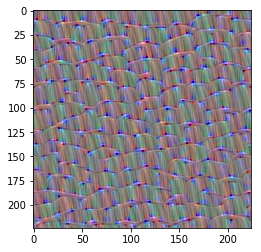

In [2]:
deep_vis.browse()

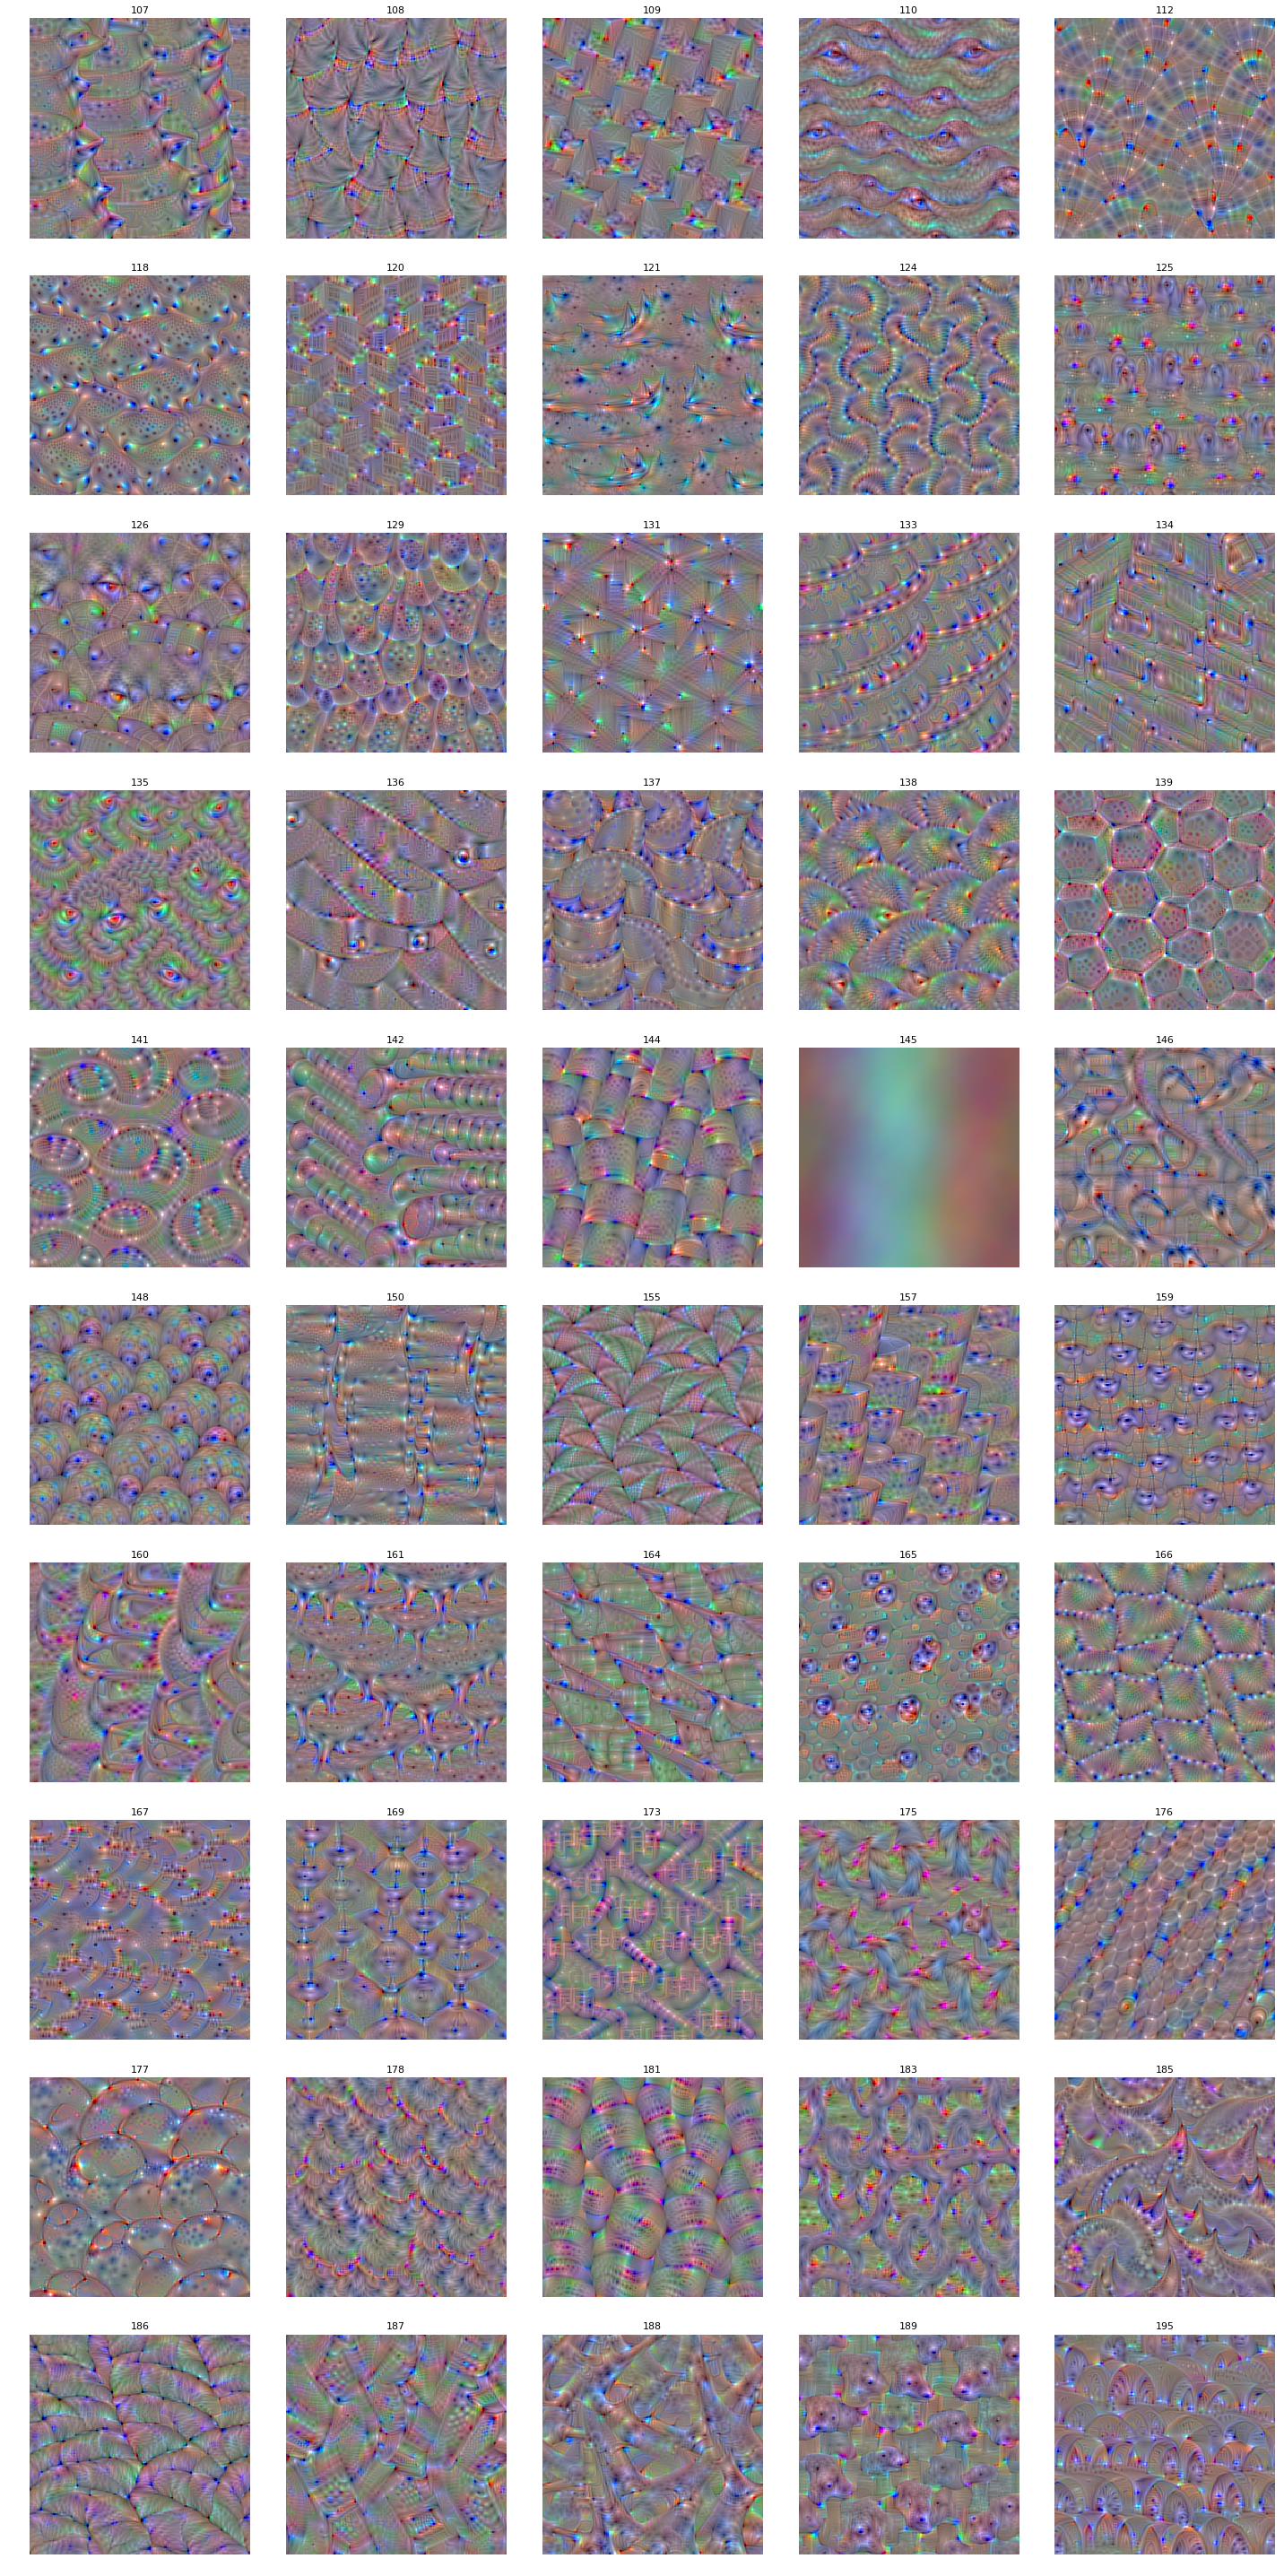

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact


def plot_list(img_list,labels = None, cols_nr = None, **kwargs):
    '''
        Plots a list of images in a grid with labels if specified
        Inputs:
            img_list: list, list of images to be plotted
            labels:list/array or None, labels to be added to images
            cols_nr: int or None, number of columns of the image grid
    '''
        
    n = len(img_list)
    
    if not cols_nr:
        cols_nr = int(np.sqrt(n))
    rows_nr = np.ceil(1.0*n/cols_nr)
    
    plt.figure(figsize=(20,40))
    if labels is not None:       
        for i,(img,lab) in enumerate(zip(img_list,labels)):
            plt.subplot(rows_nr,cols_nr,i+1)
            plt.imshow(img)
            plt.axis('off')
            plt.title(lab,fontsize=11)
            
        plt.tight_layout()
        plt.show()    
    else:
        for i,img in enumerate(img_list):
            plt.subplot(rows_nr,cols_nr,i+1)
            plt.imshow(img)
            plt.axis('off')
            
        plt.tight_layout()
        plt.show() 

save_dir='/mnt/ml-team/homes/jakub.czakon/.unblackboxing_webinar_data/data/filter_images'

def browse_layer(save_dir, batch_size=50):    
    def plot(layer_id, batch_id):
        batch_id = int(batch_id)
        layer_id = int(layer_id)
        
        files = os.listdir('{}/{}'.format(save_dir, layer_id))
        img_list, label_list = [],[]
        for f in files[batch_id*batch_size:(batch_id+1)*batch_size]:
            img = plt.imread('{}/{}/{}/img.jpg'.format(save_dir, layer_id, f))
            img_list.append(img)
            label_list.append(f)
        plot_list(img_list, label_list, cols_nr=5)
    return interact(plot, layer_id='16',batch_id='0')

browse_layer(save_dir)